<a href="https://colab.research.google.com/github/pdpranavkumar/lecture1/blob/master/Linear_Regression_Implementation_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

# importing the libraries

In [5]:

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# importing the dataset

In [6]:

dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 3 Linear Regression-Implementation/50_Startups.csv')

In [7]:
len(dataset)

50

In [8]:
dataset.shape

(50, 5)

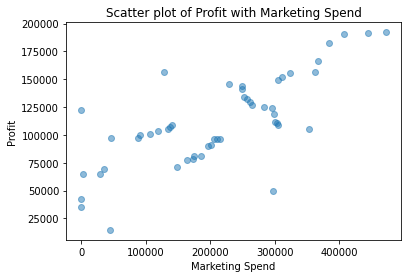

In [9]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

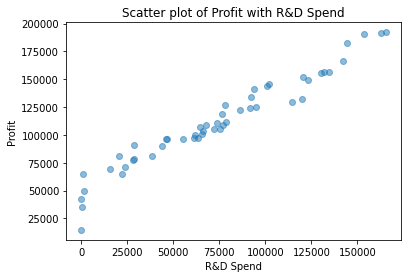

In [10]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()


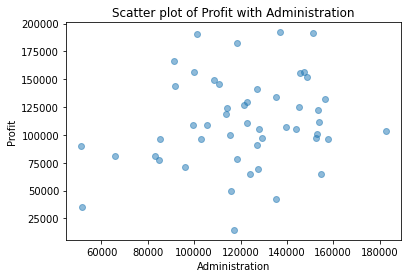

In [11]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

# Create the figure object 

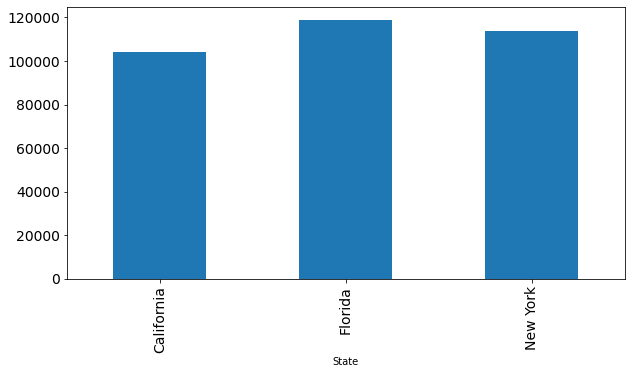

In [12]:

ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)



# set the title

In [13]:

ax.set_title("Average profit for different states where the startups operate", fontsize = 20)



Text(0.5, 1.0, 'Average profit for different states where the startups operate')

# Set x and y-labels


In [14]:
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

Text(3.200000000000003, 0.5, 'Profit')

In [15]:
dataset.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

# create dummy variables for the catgeorical variable State

In [16]:

dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)



# Drop the original column State from the dataframe


In [17]:
dataset.drop(columns=['State'],axis=1,inplace=True)


In [18]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [22]:
dependent_variable = 'Profit'

#create a list of independent variables

In [23]:
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [24]:
independent_variables

['NewYork_State',
 'California_State',
 'Administration',
 'R&D Spend',
 'Florida_State',
 'Marketing Spend']

# create a list of independent variables


In [25]:
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [26]:
independent_variables

['NewYork_State',
 'California_State',
 'Administration',
 'R&D Spend',
 'Florida_State',
 'Marketing Spend']

# create the data of independent variables

In [29]:

X = dataset[independent_variables].values




# create the dependent variable data

In [30]:
y = dataset[dependent_variable].values

In [31]:
dataset[independent_variables]

,NewYork_State,California_State,Administration,R&D Spend,Florida_State,Marketing Spend
0,1,0,136897.80,165349.20,0,471784.10
1,0,1,151377.59,162597.70,0,443898.53
2,0,0,101145.55,153441.51,1,407934.54
3,1,0,118671.85,144372.41,0,383199.62
4,0,0,91391.77,142107.34,1,366168.42
5,1,0,99814.71,131876.90,0,362861.36
6,0,1,147198.87,134615.46,0,127716.82
7,0,0,145530.06,130298.13,1,323876.68
8,1,0,148718.95,120542.52,0,311613.29
9,0,1,108679.17,123334.88,0,304981.62


# splitting the dataset into the Training set and Test set

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
X_train[0:10]

array([[0.0000000e+00, 0.0000000e+00, 1.0305749e+05, 5.5493950e+04,
        1.0000000e+00, 2.1463481e+05],
       [1.0000000e+00, 0.0000000e+00, 8.5047440e+04, 4.6014020e+04,
        0.0000000e+00, 2.0551764e+05],
       [0.0000000e+00, 0.0000000e+00, 1.4413598e+05, 7.5328870e+04,
        1.0000000e+00, 1.3405007e+05],
       [0.0000000e+00, 1.0000000e+00, 1.5769392e+05, 4.6426070e+04,
        0.0000000e+00, 2.1079767e+05],
       [0.0000000e+00, 0.0000000e+00, 1.1417579e+05, 9.1749160e+04,
        1.0000000e+00, 2.9491957e+05],
       [0.0000000e+00, 0.0000000e+00, 1.4553006e+05, 1.3029813e+05,
        1.0000000e+00, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.5654742e+05, 1.1994324e+05,
        1.0000000e+00, 2.5651292e+05],
       [1.0000000e+00, 0.0000000e+00, 1.2415304e+05, 1.0002300e+03,
        0.0000000e+00, 1.9039300e+03],
       [1.0000000e+00, 0.0000000e+00, 5.1743150e+04, 5.4205000e+02,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00,

# Transforming data

In [34]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X_train[0:10]

array([[0.        , 0.        , 0.48655174, 0.33561668, 1.        ,
        0.45494286],
       [1.        , 0.        , 0.3173015 , 0.2782839 , 0.        ,
        0.43561799],
       [0.        , 0.        , 0.87258866, 0.45557444, 1.        ,
        0.28413435],
       [0.        , 1.        , 1.        , 0.2807759 , 0.        ,
        0.44680961],
       [0.        , 0.        , 0.59103645, 0.55488118, 1.        ,
        0.62511553],
       [0.        , 0.        , 0.88568959, 0.7880179 , 1.        ,
        0.68649342],
       [0.        , 0.        , 0.98922572, 0.72539353, 1.        ,
        0.54370828],
       [1.        , 0.        , 0.6847981 , 0.0060492 , 0.        ,
        0.0040356 ],
       [1.        , 0.        , 0.00432296, 0.00327821, 0.        ,
        0.        ],
       [1.        , 0.        , 0.95618996, 0.39676926, 0.        ,
        0.22709197]])

# fitting Multiple Linear Regression to the Training set

In [36]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
regressor.intercept_

44153.95466784857

In [38]:
regressor.coef_

array([ 7.86007422e+02,  8.66383692e+01,  3.49927567e+03,  1.27892182e+05,
       -8.72645791e+02,  1.72720281e+04])

In [39]:
y_pred_train = regressor.predict(X_train)

In [40]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

#predicting the Test set results

In [43]:
y_pred = regressor.predict(X_test)

#Predicted profit on the test data

In [44]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

# actual profits on test data


In [45]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [46]:
mean_squared_error(y_test, y_pred)

83502864.03257735

# train performance

In [47]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.666612578969

# test performance

In [48]:
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794944

In [49]:
r2_score(y_train, y_pred_train)

0.9501847627493607

In [50]:
r2_score(y_test, y_pred)

0.9347068473282425